# Challenge 2

### Imports

In [1]:
import requests
import os
from bs4 import BeautifulSoup

import numpy as np

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

### Log in to hackthissite.org

In [2]:
username = "FriedrichMaximilian"
password = os.getenv('HTS_PASSWORD')
if not password:
    print("Password not found in environment variables. Please set 'HTS_PASSWORD'.")
    exit()

login_url = "https://www.hackthissite.org/user/login"
mission_url = "https://www.hackthissite.org/missions/prog/2/"
submit_url = "https://www.hackthissite.org/missions/prog/2/index.php"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Referer': login_url,
}

session = requests.Session()

login_page_response = session.get(login_url, headers=headers)

if login_page_response.status_code == 200:
    print("Login page fetched successfully!")
else:
    print(f"Failed to fetch login page with status code: {login_page_response.status_code}")
    exit()

login_data = {
    'username': username,
    'password': password
}

login_response = session.post(login_url, data=login_data, headers=headers)

if "hello" in login_response.text.lower():
    print("Login successful!")
else:
    print("Login failed.")

Login page fetched successfully!
Login successful!


### Fetch image

Mission page fetched successfully!


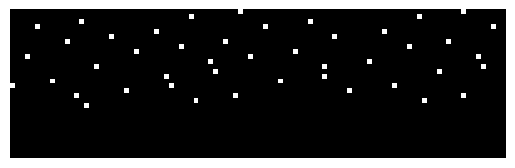

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
mission_response = session.get(mission_url, headers=headers)

if mission_response.status_code == 200:
    print("Mission page fetched successfully!")
else:
    print(f"Failed to fetch mission page with status code: {mission_response.status_code}")
    exit()

# Extract image URL (since it's a relative URL, prepend the base URL)
image_url = "https://www.hackthissite.org/missions/prog/2/PNG"

# Download the image
image_response = session.get(image_url)

if image_response.status_code == 200:

    image = Image.open(BytesIO(image_response.content))

    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

    image_matrix = np.array(image)
    print(image_matrix)
else:
    print(f"Failed to fetch image with status code: {image_response.status_code}")

In [6]:
print(image_matrix[0])
print(len(image_matrix))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
30
